In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df = pd.read_csv('advertising.csv')

In [5]:
# first five rows 
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
#drop radio and newspaper column from df

df.drop(columns=['Radio','Newspaper'],inplace=True,axis=1)

In [7]:
# View the dimensions of df

df.shape

(200, 2)

In [8]:
# View the top 5 rows of df

df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [9]:
# View dataframe summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [11]:
# Declare feature variable and target variable
# TV and Sales data values are given by X and y respectively.

X = df.TV
y = df.Sales

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

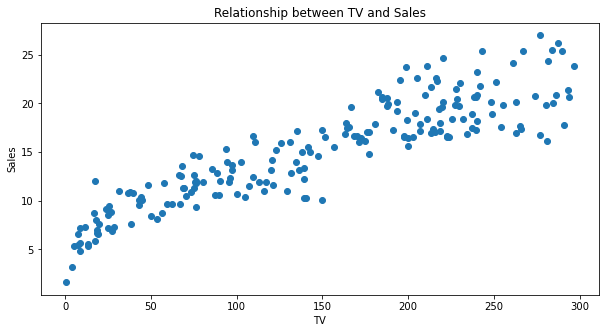

In [13]:
# Visualise the relationship between the features and the response using scatterplots

plt.figure(figsize=(10,5))

plt.scatter(X,y)

plt.title('Relationship between TV and Sales')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

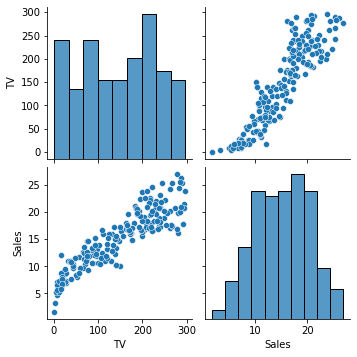

In [14]:
# plot a pairplot also for df

sns.pairplot(df)

In [15]:
# Print the dimensions of X and y
print(X.shape)
print(y.shape)

(200,)
(200,)


In [16]:
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [17]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [18]:
# Reshape X and y
X = np.array(X)
X = np.reshape(X,(-1,1))

y = np.array(y)
y = np.reshape(y,(-1,1))

In [19]:
# Print the dimensions of X and y after reshaping
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [20]:
# run it if you want

#X

In [21]:
# run it if you want

#y

In [22]:
# import train_test_split module
from sklearn.model_selection import train_test_split

# Split X and y into training and test data sets with test_size=0.3 and random_state=42

X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
# print shapes of X_train,y_train, X_test, y_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(140, 1)
(60, 1)
(60, 1)


In [24]:
# import LinearRegression module
from sklearn.linear_model import LinearRegression as lir


# Instantiate the linear regression object lm
lm = lir()
# Fit and train the model using training data sets
lm.fit(X_train,X_test)
# Predict on the test data
y_pred_test = lm.predict(y_train)

In [25]:
# Compute model slope and intercept
print('Estimated model slope, a: {}'.format(lm.coef_))
print('Estimated model intercept, b: {}'.format(lm.intercept_))

Estimated model slope, a: [[0.05483488]]
Estimated model intercept, b: [7.20655455]


In [26]:
# So comment below, our fitted regression line here is ?

y = 0.05483488 * X + 7.20655455

In [27]:
df.TV.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [28]:
# Predicting Sales values on first five 5 TV  datasets only
pred_x = lm.predict(X)
pred_x[:5]

array([[19.82406131],
       [ 9.64670688],
       [ 8.14971455],
       [15.51403944],
       [17.12070154]])

In [29]:
# prediction for all X present in the dataset

# if you want to see it remove # from pred_x
#pred_x

In [30]:
# import mean_squared_error module
from sklearn.metrics import mean_squared_error as mse


# Calculate and print Root Mean Square Error(RMSE)
mse = mse(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(f'RMSE value:: {rmse}')

RMSE value:: 2.2758570698017597


In [31]:
# import r2_score module
from sklearn.metrics import r2_score


# Calculate and print r2_score
r2 = r2_score(y_test,y_pred_test)
print(f'R2 Score value:: {r2 }')

R2 Score value:: 0.814855389208679


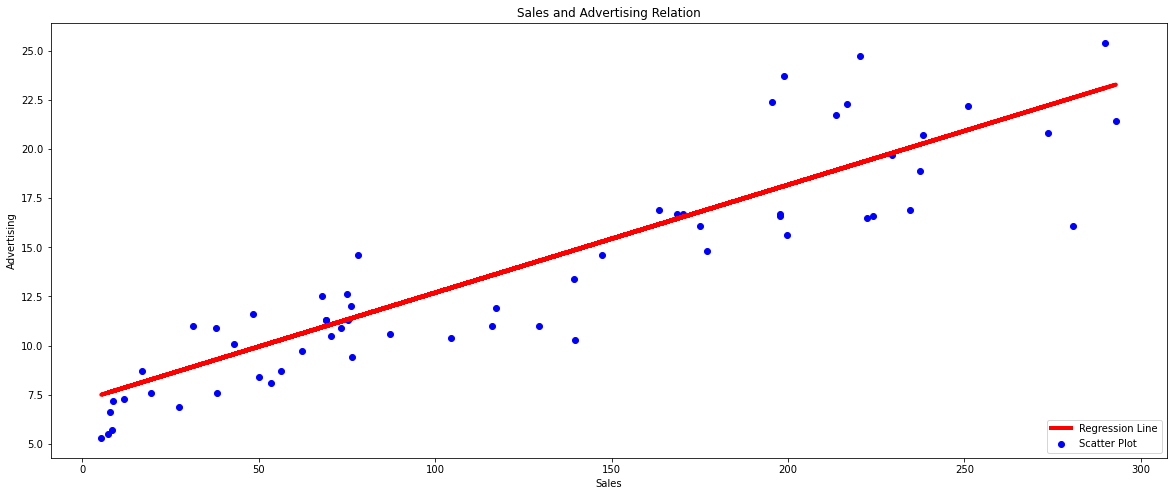

In [32]:
# Plot the Regression Line between X and Y as shown in below output.

plt.figure(figsize=(20,8))
plt.scatter(y_train,y_test,color='blue',label='Scatter Plot')
plt.plot(y_train,y_pred_test,color='red',linewidth=4,label='Regression Line')

plt.legend(loc=4)
plt.title('Sales and Advertising Relation')
plt.xlabel('Sales')
plt.ylabel('Advertising')

plt.show()

In [33]:
X_test.shape,X_train.shape,y_train.shape,y_test.shape

((140, 1), (140, 1), (60, 1), (60, 1))

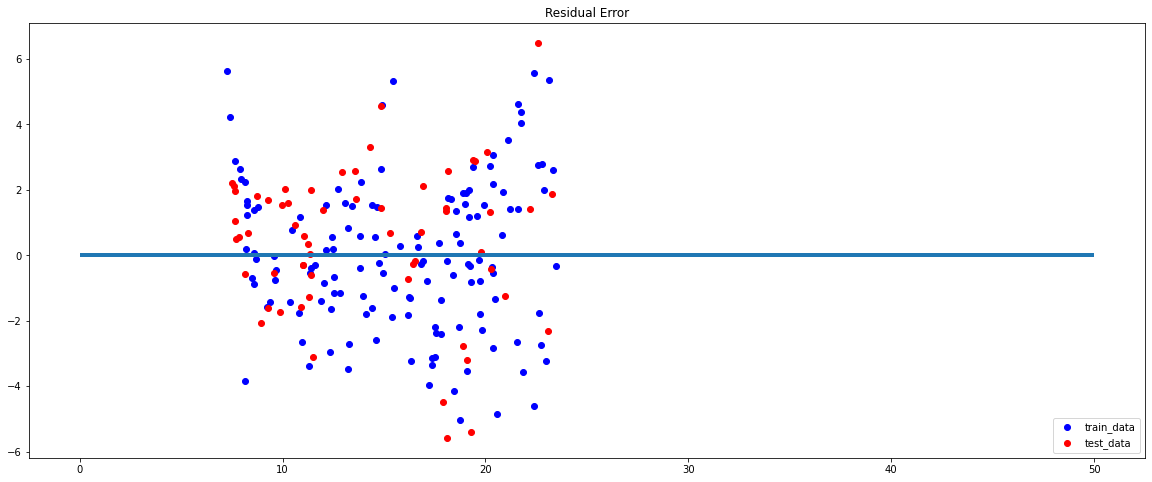

In [34]:
# Plotting residual errors

plt.figure(figsize=(20,8))
plt.scatter(lm.predict(X_train),lm.predict(X_train) - X_test,color='blue',label='train_data')
plt.scatter(lm.predict(y_train),lm.predict(y_train) - y_test,color='red',label='test_data')

plt.hlines(xmin=0,xmax=50,y=0,linewidth=4)
plt.legend(loc=4)
plt.title('Residual Error')

plt.show()

In [35]:
# Checking for Overfitting or Underfitting the data by calculation score using score function.
print(f'Training set score:: {lm.score(X_train,X_test)}')
print(f'Test set score:: {lm.score(y_train,y_test)}')


Training set score:: 0.799626928219267
Test set score:: 0.814855389208679
